# Sunspots Dataset

The Sunspots dataset consists of observations of the number of sunspots on the Sun, recorded each month. It spans the time period from January 1749 to December 1983, providing a long-term view of solar activity. 

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

This dataset is invaluable for time series analysis and forecasting due to its longevity, regularity, and the clear cyclical patterns it presents, which are reflective of the approximately 11-year solar cycle. Researchers and analysts commonly use this dataset to practice and test forecasting models, including ARIMA, exponential smoothing, and more modern machine learning approaches. The dataset's extensive history makes it particularly suitable for studying long-term trends and cyclic behavior in solar activity, offering insights into past solar cycles and helping predict future solar phenomena. 

In [69]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [70]:
dataset_name = "sunspots"

In [71]:
input_fname = "sunspots.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [72]:
data = pd.read_csv(input_fname)
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


# Prepare Data

In [73]:
series_col = "Series"
epoch_col = 'Month'
epoch_label = "Month"
time_col = 'Month'
value_col = 'Sunspots'
exog_cols = []

## Parse the 'Period' Column as DateTime

In [74]:
# Convert the 'Month' column to datetime format in 'yyyy-mm-dd' format
data[epoch_col] = pd.to_datetime(data[epoch_col], format='%Y-%m')

data.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [75]:
data.tail()

,Month,Sunspots
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3
2819,1983-12-01,33.4


In [76]:
data[epoch_col].nunique()

2820

## Aggregate to quarterly frequency

In [77]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.resample('Q').sum()
data.reset_index(inplace=True)

data.rename(columns={'Month': 'Quarter'}, inplace=True)
time_col = 'Quarter'
epoch_col = 'Quarter'
epoch_col = 'Quarter'

data = data.iloc[-760:]

# Add series id

In [78]:
if series_col not in data:
    data.insert(0, series_col, 1)
data.head()

,Series,Quarter,Sunspots
180,1,1794-03-31,127.0
181,1,1794-06-30,125.6
182,1,1794-09-30,92.1
183,1,1794-12-31,147.3
184,1,1795-03-31,73.9


# Visualize Data

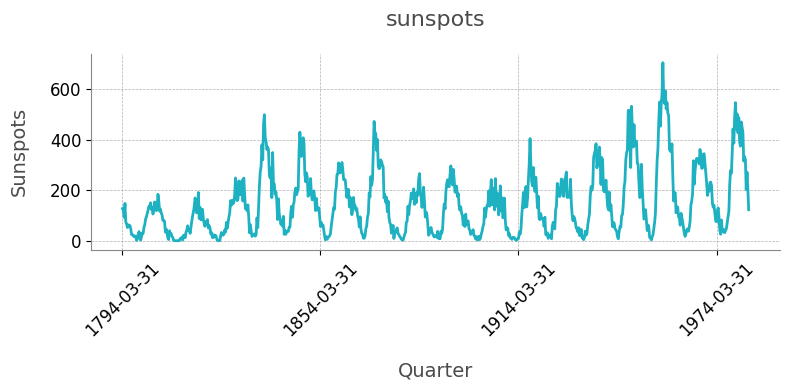

In [82]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(8, 4))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_col, fontsize=14, fontdict=font, labelpad=15)
plt.ylabel(value_col, fontsize=14, fontdict=font, labelpad=15)
plt.title(dataset_name, fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::240], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Main Data File

In [80]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)

data[all_cols].to_csv(outp_fname, index=False)